# Condiciones para obtener una solución normalizable

La constante de normalización obtenida es:
$$C=\sqrt{\frac{\kappa}{2\left[\chi^2-e^{-2\kappa L}(\chi+(\chi+1)\kappa L)\right]}}$$
donde $\chi=\kappa v/m_0$.
Como sabemos que $\kappa >0$, para que la solución sea normalizable debe cumplirse que
$$f(\chi)=\chi^2-e^{-2\kappa L}(\chi+(\chi+1)\kappa L)>0  \tag{0}$$


El valor de $\kappa$ está determinado implícitamente por:
$$
e^{-2\kappa L}=1-\left(\frac{m_0}{v}\kappa\right)^2 \tag{1}
$$
Aníticamente se puede encontrar el valor de $\kappa$ en casos extremos.

Si $L>>1$,
$$1-\left(\frac{m_0}{v}\kappa\right)^2\approx0 \implies \kappa\approx v/m_0 $$

Si $L<<1$,
$$
e^{-2\kappa L} = 1-2\kappa L + 2(\kappa L)^2 + O(L^3)= 1-\left(\frac{m_0}{v}\kappa\right)^2
$$

$$
\kappa = \frac{2L}{(m_0/v)^2+2L^2} + O(L^3)
$$

La ecuación (1) tiene solución no nula a cualquier orden de $L$.

Gráficamente se puede obtener $\kappa$ para una dada longitud $L$.

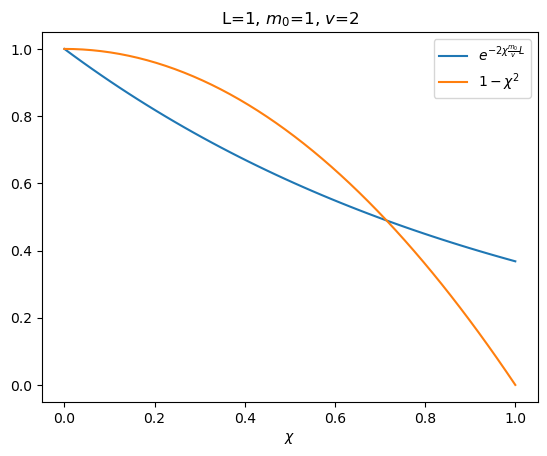

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def f(kappa, L):
    return np.exp(-2*kappa*L)

def g(kappa, m_0, v):
    chi = kappa*v/m_0
    return 1-chi**2
L = 1
m_0 = 1
v = 2

chi_values = np.linspace(0, 1)
fig, ax = plt.subplots()
ax.plot(chi_values, [f(m_0/v*chi, L) for chi in chi_values], label=r"$e^{-2\chi\frac{m_0}{v} L}$")
ax.plot(chi_values, [g(m_0/v*chi, m_0, v) for chi in chi_values], label=r"$1-\chi^2$")
ax.legend()
ax.set_xlabel(r"$\chi$")
ax.set_title(rf"L={L}, $m_0$={m_0}, $v$={v}");

También se puede despejar $\kappa L$ de (1)

$$\kappa L = -\frac{1}{2}log(1-\chi^2),$$

de tal manera de reescribir $f(\chi)$ en (0)
$$f(\chi)=\chi^2-e^{-2\kappa L}(\chi+(\chi+1)\kappa L)$$
$$=\chi^2-(1-\chi^2)(\chi+(\chi+1)\kappa L)$$
$$=\chi^2-(1-\chi^2)\left(\chi-(\chi+1)\frac{1}{2}log(1-\chi^2)\right) \tag{2}$$
Numéricamente, se puede buscar $\chi_c$ de tal manera que $f(\chi_c)=0$

/tmp/ipykernel_23226/1583068225.py:5: RuntimeWarning: divide by zero encountered in log
  return chi**2-(1-chi**2)*(chi-(chi+1)/2*np.log(1-chi**2))
/tmp/ipykernel_23226/1583068225.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  return chi**2-(1-chi**2)*(chi-(chi+1)/2*np.log(1-chi**2))
/tmp/ipykernel_23226/1583068225.py:5: RuntimeWarning: invalid value encountered in log
  return chi**2-(1-chi**2)*(chi-(chi+1)/2*np.log(1-chi**2))


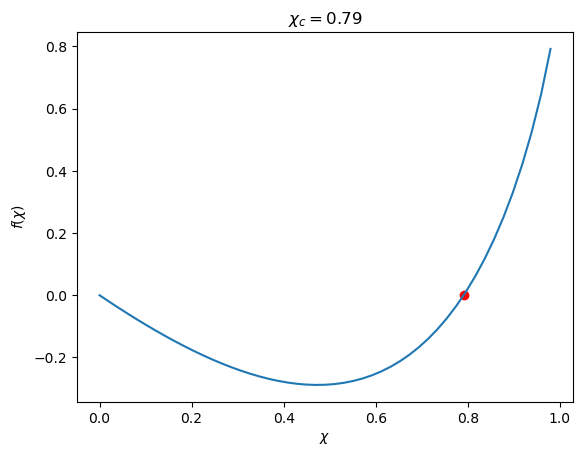

In [92]:
import scipy
from scipy.optimize import root_scalar

def f_chi(chi):
    return chi**2-(1-chi**2)*(chi-(chi+1)/2*np.log(1-chi**2))

chi_values = np.linspace(0, 1)
fig, ax = plt.subplots()
ax.plot(chi_values, [f_chi(chi) for chi in chi_values])
ax.set_ylabel(r"$f(\chi)$")
root = scipy.optimize.brentq(f_chi, 0.1, 2)
ax.scatter(root, f_chi(root), color="red")
ax.set_xlabel(r"$\chi$")
ax.set_title(rf"$\chi_c={root:.2}$");

Luego, para que sea normalizable la solución debe cumplirse que
$$\chi= \kappa v/m_0 > \chi_c \approx 0.8$$
que usando (2) esta condición se puede escribir en términos de la longitud $L$ como
$$L>-\frac{v}{2m_0\chi_c}log(1-\chi_c^2)\approx \frac{v}{m_0}0.6$$